## 1-2 데이터를 준비하자!

- tensorflow의 표준 API tf.keras 의 Sequential API를 이용하여 숫자 손글씨 인식기를 만든다.


In [11]:
# 라이브러리 불러오기

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print('텐서플로우버전:', tf.__version__) # tensorflow의 버전 출력

mnist = keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

print('x_trian 배열의 크기 출력:'  ,len(x_train)) # x_train 배열의 크기를 출력

텐서플로우버전: 1.14.0
x_trian 배열의 크기 출력: 60000


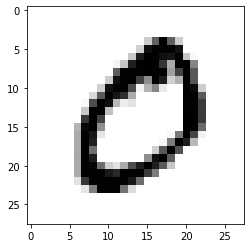

In [17]:
plt.imshow(x_train[1], cmap=plt.cm.binary)
plt.show()

In [16]:
print(y_train[1])

0


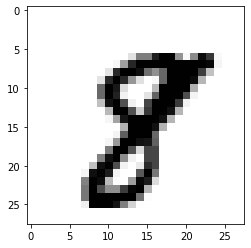

In [21]:
#index에 0에서 59999 사이 숫자를 지정해 보세요
index = 55
plt.imshow(x_train[index], cmap=plt.cm.binary)
plt.show()

## 학습용 데이터와 심험용 데이터
___

In [22]:
print(x_train.shape)

(60000, 28, 28)


In [23]:
print(x_test.shape)

(10000, 28, 28)


In [25]:
print(' 최소값: ', np.min(x_train), '최대값:', np.max(x_train))

 최소값:  0 최대값: 255


In [26]:
x_train_norm, x_test_norm = x_train/255.0, x_test/255.0
print('최소값:', np.min(x_train_norm), '최대값:',np.max(x_train_norm))

최소값: 0.0 최대값: 1.0


## 1.3 딥러닝 네트워크 설계하기

### Sequenential Model을 사용해 보자
___

In [28]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수:', len(model.layers))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model에 추가된 Layer 개수: 7


In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

## 1-4 딥러닝 네트워크 학습시키기

- 현재 네트워크 입력은 (데이터갯수, 이미지 크기 x, 이미지 크기 y, 채널수)와 같은 형태를 가진다

- print(x_train.shape) 을 해보면(60000, 28, 28) 로 채널수가 대한 정보가 없다

- 따라서 (60000, 28, 28, 1) 로 만들어 채널 인자 값을 넣어준다.

In [30]:
print("Before Reshape-x_train_norm shape:{}".format(x_train_norm.shape))
print("Before Reshape-x_test_norm shape:{}".format(x_test_norm.shape))

x_train_reshaped = x_train_norm.reshape(-1, 28, 28, 1) #데이터갯수에 -1 을 쓰면 reshape시 자동 계산됩니다.
x_test_reshaped = x_test_norm.reshape(-1,28,28,1)

print("After Reshape-x_train_reshaped shape:{}".format(x_train_reshaped.shape))
print("After Reshpae-x_test_reshaped shape:{}".format(x_test_reshaped.shape))


Before Reshape-x_train_norm shape:(60000, 28, 28)
Before Reshape-x_test_norm shape:(10000, 28, 28)
After Reshape-x_train_reshaped shape:(60000, 28, 28, 1)
After Reshpae-x_test_reshaped shape:(10000, 28, 28, 1)


In [32]:
model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs = 10)

Epoch 1/10
60000/60000 [==============================] - 11s 180us/sample - loss: 0.2089 - acc: 0.9364
Epoch 2/10
60000/60000 [==============================] - 11s 183us/sample - loss: 0.0711 - acc: 0.9786
Epoch 3/10
60000/60000 [==============================] - 11s 181us/sample - loss: 0.0528 - acc: 0.9839
Epoch 4/10
60000/60000 [==============================] - 11s 186us/sample - loss: 0.0426 - acc: 0.9866
Epoch 5/10
60000/60000 [==============================] - 11s 185us/sample - loss: 0.0348 - acc: 0.9893
Epoch 6/10
60000/60000 [==============================] - 11s 190us/sample - loss: 0.0293 - acc: 0.9905
Epoch 7/10
60000/60000 [==============================] - 11s 186us/sample - loss: 0.0243 - acc: 0.9921
Epoch 8/10
60000/60000 [==============================] - 11s 184us/sample - loss: 0.0206 - acc: 0.9937
Epoch 9/10
60000/60000 [==============================] - 12s 197us/sample - loss: 0.0178 - acc: 0.9942
Epoch 10/10
60000/60000 [==============================] - 11s 1

## 1-5 얼마나 잘 만들었는지 확인하기

테스트 데이터로 성능을 확인해 보자
___

In [34]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss:{}".format(test_loss))
print("test_accuracy{}".format(test_accuracy))

10000/10000 - 1s - loss: 0.0415 - acc: 0.9888
test_loss:0.04149089626784844
test_accuracy0.9887999892234802


In [35]:
predicted_result = model.predict(x_test_reshaped) #model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx = 0 # 1번째 x_test 를 살펴보자
print('model.predict() 결과:', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과:', predicted_labels[idx])
print('실제 데이터의 라벨:', y_test[idx])

model.predict() 결과: [7.2067508e-09 2.8895428e-10 1.7763106e-06 3.8359458e-06 4.2846310e-10
 8.9420311e-08 4.2885752e-16 9.9999189e-01 1.6941432e-06 6.4423222e-07]
model이 추론한 가장 가능성이 높은 결과: 7
실제 데이터의 라벨: 7


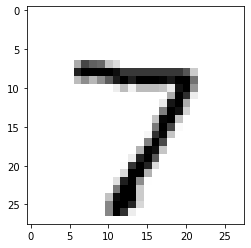

In [36]:
plt.imshow(x_test[idx], cmap = plt.cm.binary)
plt.show()

예측확률분포:[2.0038031e-10 2.0008292e-05 9.7236745e-02 4.1130838e-13 9.0270370e-01
 6.0370642e-10 3.9511040e-05 7.8801184e-12 2.6425528e-11 1.1808064e-15]
라벨:2예측결과:4


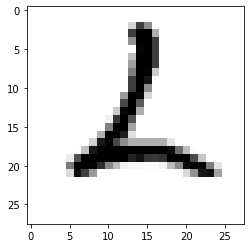

예측확률분포:[9.9045483e-06 9.4647920e-01 1.4203796e-02 3.5114722e-06 1.2174284e-03
 1.6838358e-05 3.8056299e-02 1.1283750e-08 1.3044313e-05 5.4862173e-09]
라벨:6예측결과:1


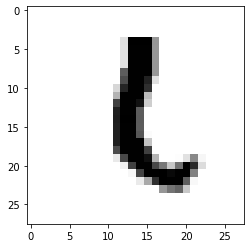

예측확률분포:[8.5478842e-01 1.3166159e-09 2.7493417e-07 1.3773307e-08 1.9870765e-06
 2.1110363e-04 1.4499231e-01 6.3449450e-09 5.5401983e-06 2.9819012e-07]
라벨:6예측결과:0


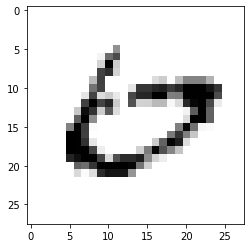

예측확률분포:[5.0247265e-03 8.4668529e-11 1.2111155e-03 2.0850667e-08 6.1780874e-09
 6.1053601e-07 2.8206961e-02 4.8234139e-10 9.6555662e-01 1.7296677e-10]
라벨:6예측결과:8


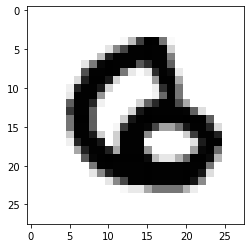

예측확률분포:[9.7092885e-01 7.8637416e-11 1.2479741e-07 3.3992784e-11 1.5368622e-09
 1.0195143e-05 2.9049385e-02 4.0917771e-09 1.1511424e-05 3.5812744e-09]
라벨:6예측결과:0


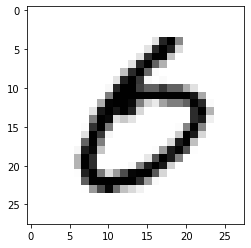

In [39]:
import random
worng_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test 이 달느 경우만 모아 봅시다.
    if predicted_labels[i] != y_test[i]:
        worng_predict_list.append(i)
        
# worng_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population = worng_predict_list, k = 5)

for n in samples:
    print("예측확률분포:" + str(predicted_result[n]))
    print("라벨:" + str(y_test[n]) + "예측결과:" +str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

In [48]:
# 바꿔 볼 수 있는 하이퍼파라미터들

n_channel_1 = 16
n_channel_2 = 32
n_dense = 32
n_train_epoch = 10

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2,(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss:{}".format(test_loss))
print("test_accuracy:{}".format(test_accuracy))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [51]:
model.sequential_6()

AttributeError: 'Sequential' object has no attribute 'sequential_6'

In [55]:
model.parameters()

AttributeError: 'Sequential' object has no attribute 'parameters'

In [70]:
from PIL import Image
import os, glob

In [63]:
os.getcwd()

'/home/jaejin/workplace/sba_project/aiffel'

In [83]:
# 이미지 열기
im = Image.open('rock_scissor_paper/rock/1.jpg')
 
# 이미지 크기 출력
print(im.size)
 
# 이미지 JPG로 저장
#im.save('/python.jpg')



(224, 224)


In [68]:
!pip install pillow

In [78]:
image_dir_path = os.getenv("HOME") + "/jaejin/workplace/sba_project/aiffel/rock_scissor_paper"
print("이미지 디렉토리 경로:", image_dir_path)

images = glob.glob(image_dir_path + "scissor/*.jpg" )

target_size = (28,28)
for img in images:
    old_img=image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")
print("가위 이미지 resize 완료!")

이미지 디렉토리 경로: /home/jaejin/jaejin/workplace/sba_project/aiffel/rock_scissor_paper
가위 이미지 resize 완료!


In [77]:
img

NameError: name 'img' is not defined

## 딥러닝 간단정리

- CNN 을 이용하면 각 이미지(클래스)의 특징을 파악 할 수 있다.
- input 이미지를 넣어서 각 이미지의 특징을 뽑아내어 1차원 구조로 뽑는다


- 현재 모델 설명

- 컨볼류션 추가 --> 맥스풀링(서브샘플링) --> 

- 머신러닝은 오차를 최소화 하는 과정
- epoch20 --> 20번 돌려보겠다는 뜻 질문(크로스 밸리디드랑 가른건가?

- LOSS(손실) 란? 추가자료 참고